In [ ]:
#Start of Y2 Model 
seismic_data = pd.read_csv('cleaned_seismic.csv')
seismic_data.head()
print(seismic_data.columns)

Index(['Seismic Zone', 'PGA (m/s²)', 'PGV (m/s)', 'PGD (m)',
       'Spectral Acceleration (g)', 'Soil Type', 'Site Amplification Factor',
       'Historical Earthquake Magnitude (Mw)', 'Fault Distance (km)',
       'Seismic Wave Frequency (Hz)', 'Building Height (m)',
       'Number of Stories', 'Structural Material', 'Foundation Type',
       'Natural Frequency (Hz)', 'Damping Ratio (%)', 'Mass of Structure (kg)',
       'Axial Stiffness (kN/m)', 'Bending Stiffness (kN·m²)',
       'Lateral Load Resisting System',
       'Predicted Max Inter-Story Drift Ratio (%)',
       'Predicted Max Roof Displacement (m)',
       'Predicted Base Shear Force (kN)',
       'Predicted Structural Acceleration (m/s²)',
       'Predicted Damage Index (0–1 Scale)',
       'Predicted Collapse Probability (%)', 'damage_index', 'collapse_prob',
       'collapse_risk'],
      dtype='object')


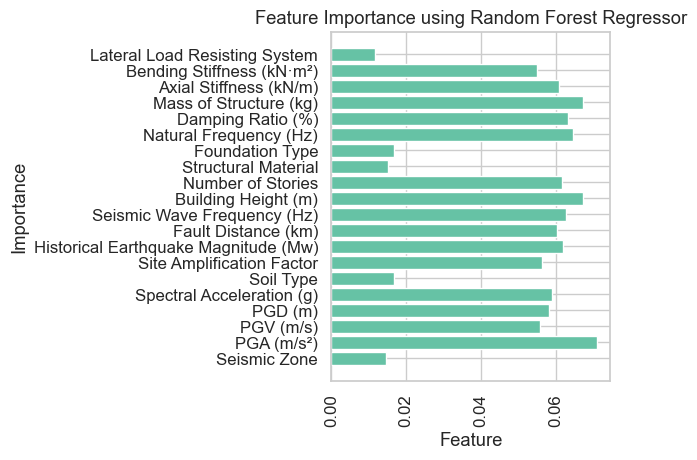

In [ ]:
# Using Important Features using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = seismic_data.drop(columns = ['Predicted Max Inter-Story Drift Ratio (%)','Predicted Max Roof Displacement (m)', 'Predicted Base Shear Force (kN)',
                                 'Predicted Structural Acceleration (m/s²)','Predicted Damage Index (0–1 Scale)','Predicted Collapse Probability (%)', 
                                 'damage_index', 'collapse_prob','collapse_risk'])
y = seismic_data['damage_index']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

randomforest = RandomForestRegressor(n_estimators = 500, random_state = 42)
randomforest.fit(x_train, y_train)

importantfeatures = randomforest.feature_importances_
feature_names = x.columns

plt.barh(feature_names, importantfeatures)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance using Random Forest Regressor')
plt.tight_layout()
plt.show()



In [56]:
pearson = x.corrwith(y, method='pearson')
print(pearson)





Seismic Zone                            0.014812
PGA (m/s²)                              0.033349
PGV (m/s)                              -0.010173
PGD (m)                                 0.017167
Spectral Acceleration (g)              -0.031885
Soil Type                               0.010851
Site Amplification Factor              -0.031897
Historical Earthquake Magnitude (Mw)   -0.004693
Fault Distance (km)                    -0.012211
Seismic Wave Frequency (Hz)            -0.011449
Building Height (m)                    -0.006976
Number of Stories                      -0.076958
Structural Material                     0.007685
Foundation Type                         0.027302
Natural Frequency (Hz)                  0.067996
Damping Ratio (%)                      -0.028213
Mass of Structure (kg)                  0.024473
Axial Stiffness (kN/m)                  0.009857
Bending Stiffness (kN·m²)               0.042259
Lateral Load Resisting System           0.022135
dtype: float64


In [63]:
comparison_data = pd.DataFrame({ 'Feature': x.columns, 'Random Forest Importance': importantfeatures, 'Pearson Correlation': pearson})
comparison_data = comparison_data.sort_values(by='Random Forest Importance',ascending=False).reset_index(drop=True)
print(comparison_data.T)


                                  0                       1   \
Feature                   PGA (m/s²)  Mass of Structure (kg)   
Random Forest Importance    0.071041                0.067268   
Pearson Correlation         0.033349                0.024473   

                                           2                       3   \
Feature                   Building Height (m)  Natural Frequency (Hz)   
Random Forest Importance             0.067162                0.064659   
Pearson Correlation                 -0.006976                0.067996   

                                         4                            5   \
Feature                   Damping Ratio (%)  Seismic Wave Frequency (Hz)   
Random Forest Importance           0.063309                     0.062836   
Pearson Correlation               -0.028213                    -0.011449   

                                                            6   \
Feature                   Historical Earthquake Magnitude (Mw)   
Random Forest

In [66]:
importantfeatures_series = pd.Series(importantfeatures, index=feature_names)
top10importance = importantfeatures_series.sort_values(ascending=False).head(10)
print(top10importance)


PGA (m/s²)                              0.071041
Mass of Structure (kg)                  0.067268
Building Height (m)                     0.067162
Natural Frequency (Hz)                  0.064659
Damping Ratio (%)                       0.063309
Seismic Wave Frequency (Hz)             0.062836
Historical Earthquake Magnitude (Mw)    0.061806
Number of Stories                       0.061548
Axial Stiffness (kN/m)                  0.060753
Fault Distance (km)                     0.060404
dtype: float64


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = [0, 1, 2, 3]  # 0: low, 1: medium, 2: high
seismic_data['damage_indexnew'] = pd.cut(seismic_data['damage_index'], bins=bins, labels=labels)

top10_features = top10importance.index.tolist()
x = seismic_data[top10_features]
y = seismic_data['damage_indexnew'].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


logistic = LogisticRegression(max_iter=1000, multi_class='multinomial')
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)


label_names = ['Low', 'Moderate', 'High', 'Very High']

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = label_names))

[[ 7 13  9 19]
 [13  9 12 21]
 [14 12 14 11]
 [ 8 14 12 12]]
              precision    recall  f1-score   support

         Low       0.17      0.15      0.16        48
    Moderate       0.19      0.16      0.17        55
        High       0.30      0.27      0.29        51
   Very High       0.19      0.26      0.22        46

    accuracy                           0.21       200
   macro avg       0.21      0.21      0.21       200
weighted avg       0.21      0.21      0.21       200



c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = [0, 1, 2, 3]

linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

y_pred_classes = np.digitize(y_pred, bins) - 1

# Convert true values to classes as well
y_test_classes = np.digitize(y_test, bins) - 1

# Define class names for classification report
label_names = ['Low', 'Moderate', 'High', 'Very High']

# Now evaluate classification metrics
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[  0  48]
 [  0 152]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           4       0.76      1.00      0.86       152

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.58      0.76      0.66       200



c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

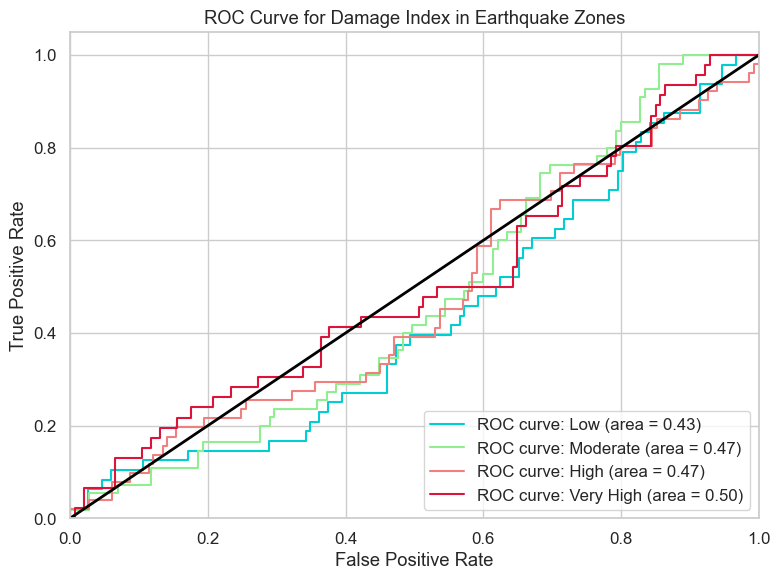

In [118]:
# ROC and AUC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = logistic.predict_proba(x_test)
n_classes = y_score.shape[1]

# 7. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Plot Multiclass ROC
colours = ['darkturquoise', 'lightgreen', 'lightcoral', 'crimson']
plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colours):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'ROC curve: {label_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Damage Index in Earthquake Zones')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()